# Function def

In [1]:
import numpy as np
import scipy.sparse.linalg as sp_lg
import scipy.sparse as sp
import scipy as scp
import numpy.linalg as lg
import matplotlib.pyplot as plt
%matplotlib inline

EI = 2 * 10 ** 11 * (1/12) * 0.04 * 0.2 ** 3
L = 10
s = 2
xleft = 0.0
xright = L
yleft = 0.0
yright = 0.0
g = 9.8

In [11]:
def A(h, N): 
    d0 = np.ones(N)
    d1 = np.ones(N-1)
    d2 = np.ones(N-2)
    A = (6*np.diag(d0,0) + -4*np.diag(d1,-1) + -4*np.diag(d1,1) + 1*np.diag(d2,-2) + 1*np.diag(d2,2))
    A[0,0] = 5
    A[N-1,N-1] = 5
    return A * EI/(h ** 4)

def beig(h,N,x,yleft,yright, qM):
    result = qM*np.ones(N)
    return result 

def bm(h,N,x,yleft,yright, qm):
    result = np.zeros(N)
    if(((L/2-s/2)/h - 1).is_integer() == True):
        for i in range(int((L/2-s/2)/h ),int((L/2+s/2)/h)):
            if (i==int((L/2-s/2)/h - 1) or i == int((L/2+s/2)/h - 1)):
                result[i] = result[i] + qm/2
            else:
                result[i] = result[i] + qm
    return result 

def bn(h,N,x,yleft,yright, qm):
    result = np.zeros(N)
    for i in range(int((L/2-s/2)/h),int((L/2+s/2)/h)):
        result[i] = result[i] + 125 * np.pi* g * np.sin(np.pi*((h*i-4)/2))
    return result
    

def solve(h,N,x,yleft,yright, k, qM, qm):
    AA = A(h,N)
    if k == 1:
        bb = beig(h,N,x,yleft,yright, qM)
    elif k == 2:
        bb = bm(h,N,x,yleft,yright, qm)
    elif k==3:
        bb = beig(h,N,x,yleft,yright, qM)
        bb = bb + bm(h,N,x,yleft,yright, qm)
    elif k == 4:
        bb = beig(h,N,x,yleft,yright, qM)
        bb = bb + bn(h,N,x,yleft,yright, qm) 
    y = lg.solve(AA,bb)
    result = np.concatenate(([yleft],y,[yright]))
    return result

def main(N, k, qM = 611.52, qm = 2450.0):
    h = (xright  - xleft)/(N+1)
#    print("Stepsize (h): {:.2f}".format(h))
    x = np.linspace(xleft,xright,N+2)                                 
    y = solve(h,N,x,yleft,yright,k, qM, qm)
    return x,y

def plot(x,y):
    plt.figure("Boundary value problem")
    plt.plot(x,y,"k")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("De graph of the function y")
    plt.legend("y", loc="best")
    
def table(x,y,N):    
    print ("{:>4}{:>11}{:>21}".format("k", "x_k", "y(x_k)"))
    for k in range(0, N+2):
        print ("{:4.0f}{:11.2f}{:23.7e}".format(k, x[k], y[k]))

In [3]:
def func(qm):
    N = 199
    x,y = main(N, 3,611.52, qm)
    return np.max(y) - 0.03

def bisection(func, x1, x2, tol=0.01, nmax=10):
    i = 0
    for i in range(nmax):
        xm = (1/2)*(x1 + x2)
        fm = func(xm)
        if func(xm) * func(x2) <= 0:
            x1 = xm
        else:
            x2 = xm
        i += 1
        if np.abs(func(x1)) < tol:
            break    
    if i == nmax:
        a = str('Warning: the nmax is exeeded')
        print(a)
    return x1

# Assignment 2.11


In [4]:
N = 9
x,y = main(N, 3)
#plot(x,y)
table(x,y,len(y)-2)

   k        x_k               y(x_k)
   0       0.00          0.0000000e+00
   1       1.00          8.8870687e-03
   2       2.00          1.6936605e-02
   3       3.00          2.3425736e-02
   4       4.00          2.7746250e-02
   5       5.00          2.9404594e-02
   6       6.00          2.8021875e-02
   7       7.00          2.3793236e-02
   8       8.00          1.7258167e-02
   9       9.00          9.0708187e-03
  10      10.00          0.0000000e+00


# Assignment 2.12

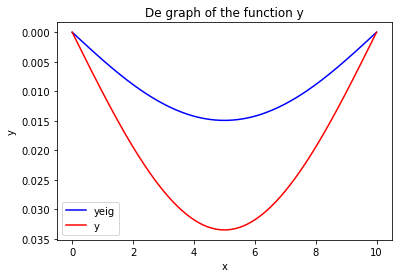

5.0 0.014929985948
5.0 0.0334815006134


In [12]:
N = 199
x,y = main(N, 1)
x2,y2 = main(N, 3)
plt.figure("Boundary value problem")
plt.plot(x,y,"b", x2,y2,"r")
plt.xlabel("x")
plt.ylabel("y")
plt.title("De graph of the function y")
plt.legend({"yeig","y"}, loc="best")
plt.gca().invert_yaxis()
plt.show()
#table(x,y,len(y)-2)

print(x[(np.argmax(y))], (np.max(y)))
print(x2[(np.argmax(y2))], (np.max(y2)))


# assignment 2.13

In [6]:
qmopt = bisection(func, 1000, 30000, tol = 1e-15, nmax = 100)

In [7]:
x,y = main(N, 3, qm =  qmopt)
print("The max valuea for m is:", qmopt*2/g, "the deflection for this m is:", np.max(y))
print("the truncation error is smaller than: 1e-15")

The max valuea for m is: 406.1666749001851 the deflection for this m is: 0.03
the truncation error is smaller than: 1e-15


# Assignment 2.14

To determind the value of Am we need to solve the following equation:

$$\int_{L/2-s/2}^{L/2+s/2} (Am*\sin(\pi*\frac{x-(L/2-s/2)}{s})) dx = 500$$

solving this equation results in:

$$ Am = 125\pi$$

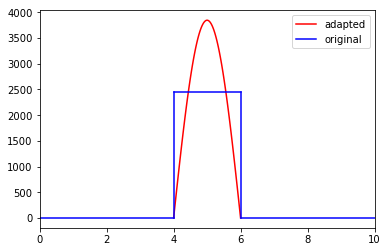

In [8]:
x = np.linspace(4,6,100)
x2 = 4*np.ones(100)
x3 = 6*np.ones(100)
x4 = np.linspace(0,4,100)
x5 = np.linspace(6,10,100)
y1 = (500 * g / s)*np.ones(100)
y2 = 125 * np.pi* g * np.sin(np.pi*((x-4)/2))
y3 = np.linspace(0,500 * g / s,100)
y4 = np.zeros(100)

plt.plot(x,y2, 'r', x,y1, 'b', x2,y3,'b',x3,y3,'b', x4,y4,'b',x5,y4,'b')
plt.legend({"original","adapted"}, loc="best")
plt.xlim(0, 10);

# Assignment 2.15 

In [9]:
N=199
x,y = main(N, 4)
np.max(y)

0.033850907399565464